COVID 19 Data Analysis

In [ ]:
Importing modules

In [136]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

In [ ]:
Importing dataset

In [3]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 683 entries, Province/State to 11/30/21
dtypes: float64(2), int64(679), object(2)
memory usage: 1.5+ MB


In [12]:
df.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '11/21/21', '11/22/21', '11/23/21', '11/24/21', '11/25/21', '11/26/21',
       '11/27/21', '11/28/21', '11/29/21', '11/30/21'],
      dtype='object', length=680)

Deleting useless columns

In [13]:
df.drop(['Province/State', 'Lat', 'Long'],axis=1,inplace=True)

KeyError: "['Province/State' 'Lat' 'Long'] not found in axis"

In [16]:
df.head(20)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
1,Albania,0,0,0,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
2,Algeria,0,0,0,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
3,Andorra,0,0,0,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
4,Angola,0,0,0,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,4135,4136,4138,4138,4141,4141,4141,4141,4141,4141
6,Argentina,0,0,0,0,0,0,0,0,0,...,5315348,5315989,5317633,5319867,5322127,5324039,5325560,5326448,5328416,5330748
7,Armenia,0,0,0,0,0,0,0,0,0,...,334075,334347,334878,335738,336330,337005,337522,337931,338120,338518
8,Australia,0,0,0,0,0,0,0,0,0,...,2053,2072,2087,2095,2103,2110,2117,2124,2130,2134
9,Australia,0,0,0,0,3,4,4,4,4,...,79997,80163,80408,80681,80938,81170,81355,81499,81674,81916


Aggregate Country rows

In [23]:
df_a = df.groupby('Country/Region').sum()
df_a.head(20)



,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289
Albania,0,0,0,0,0,0,0,0,0,0,...,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945
Algeria,0,0,0,0,0,0,0,0,0,0,...,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531
Andorra,0,0,0,0,0,0,0,0,0,0,...,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115
Angola,0,0,0,0,0,0,0,0,0,0,...,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,4135,4136,4138,4138,4141,4141,4141,4141,4141,4141
Argentina,0,0,0,0,0,0,0,0,0,0,...,5315348,5315989,5317633,5319867,5322127,5324039,5325560,5326448,5328416,5330748
Armenia,0,0,0,0,0,0,0,0,0,0,...,334075,334347,334878,335738,336330,337005,337522,337931,338120,338518
Australia,0,0,0,0,4,5,5,6,9,9,...,199649,200651,202115,203642,205269,206749,207984,209139,210238,211655


Exploratory Visualizations

<AxesSubplot:>

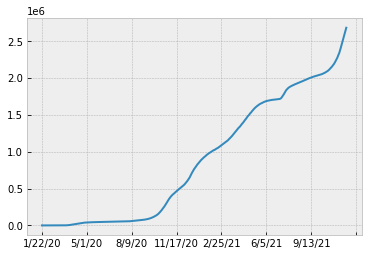

In [29]:
df_a.loc['Netherlands'].plot()

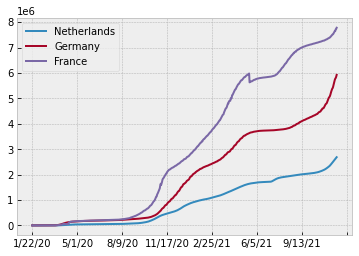

In [38]:
df_a.loc['Netherlands'].plot()
df_a.loc['Germany'].plot()
df_a.loc['France'].plot()
plt.legend()

Finding maximum infection rates through change in infection

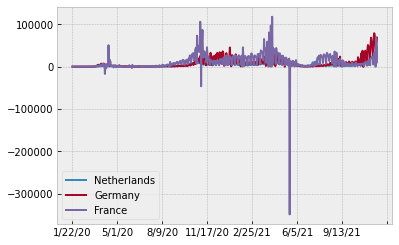

In [39]:
df_a.loc['Netherlands'].diff().plot()
df_a.loc['Germany'].diff().plot()
df_a.loc['France'].diff().plot()
plt.legend()

France is has an interesting outlier - explore further

In [41]:
df_a.loc['Netherlands'].diff().max()
#biggest change in infection rate over a 24h period was: 23783

23783.0

In [42]:
df_a.loc['Germany'].diff().max()
#biggest change in infection rate over a 24h period was: 79051

79051.0

In [43]:
df_a.loc['France'].diff().max()
#biggest change in infection rate over a 24h period was: 117902

117902.0

Find maximum infection rate for all countries

In [63]:
df_a['max infection rate'] = df_a.apply(lambda x: x.diff().max(), axis=1)

In [65]:
df_a.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,156911,157015,157032,157144,157171,157190,157218,157260,157289,3243.0
Albania,0,0,0,0,0,0,0,0,0,0,...,196611,197167,197776,198292,198732,199137,199555,199750,199945,1239.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,209111,209283,209463,209624,209817,209980,210152,210344,210531,1927.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,16299,16342,16426,16566,16712,16712,16712,16712,17115,403.0
Angola,0,0,0,0,0,0,0,0,0,0,...,65033,65061,65080,65105,65130,65139,65144,65155,65168,1493.0


New dataframe with infection rate

In [66]:
df_COV = pd.DataFrame(df_a['max infection rate'])
df_COV.head()

,max infection rate
Country/Region,
Afghanistan,3243.0
Albania,1239.0
Algeria,1927.0
Andorra,403.0
Angola,1493.0


Import second data set to compare

In [82]:
df_vac = pd.read_csv('vaccinations.csv')
df_vac.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [84]:
df_vac.shape

(64968, 16)

In [165]:
df_a.shape

(196, 680)

In [118]:
df_temp = df_vac[['location', 'date', 'daily_people_vaccinated']]
df_temp

,location,date,daily_people_vaccinated
0,Afghanistan,2021-02-22,NaN
1,Afghanistan,2021-02-23,1367.0
2,Afghanistan,2021-02-24,1367.0
3,Afghanistan,2021-02-25,1367.0
4,Afghanistan,2021-02-26,1367.0
...,...,...,...
64963,Zimbabwe,2021-11-25,22152.0
64964,Zimbabwe,2021-11-26,18876.0
64965,Zimbabwe,2021-11-27,16225.0
64966,Zimbabwe,2021-11-28,14125.0


In [178]:
pivot = df_temp.pivot(index='location', columns='date', values='daily_people_vaccinated').reset_index()

Changing dates

In [179]:
pivot

date,location,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,...,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,922993.0,998981.0,1042647.0,1134635.0,1431022.0,1190010.0,1307700.0,1070824.0,1255295.0,1239561.0
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1794.0,1729.0,1751.0,1773.0,1773.0,1726.0,1719.0,1713.0,1706.0,NaN
3,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31361.0,31361.0,27753.0,23734.0,19716.0,15698.0,11680.0,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,World,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,25798570.0,25738357.0,26018194.0,26281248.0,26869794.0,26691156.0,8871794.0,8273495.0,8276336.0,8363965.0
232,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3404.0,1361.0,1292.0,1223.0,1155.0,1278.0,1401.0,1525.0,1648.0,NaN
233,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df_a.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/22/21', '11/23/21', '11/24/21', '11/25/21', '11/26/21', '11/27/21',
       '11/28/21', '11/29/21', '11/30/21', 'max infection rate'],
      dtype='object', length=680)

In [182]:
pivot['2020-12-01'].rename()
#pivot.columns = pivot.columns.map(lambda x:x.split('-'))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
230   NaN
231   NaN
232   NaN
233   NaN
234   NaN
Name: 2020-12-01, Length: 235, dtype: float64

In [173]:
pivot.columns

Index([  ['location'], ['2020-12-01'], ['2020-12-02'], ['2020-12-03'],
       ['2020-12-04'], ['2020-12-05'], ['2020-12-06'], ['2020-12-07'],
       ['2020-12-08'], ['2020-12-09'],
       ...
       ['2021-11-20'], ['2021-11-21'], ['2021-11-22'], ['2021-11-23'],
       ['2021-11-24'], ['2021-11-25'], ['2021-11-26'], ['2021-11-27'],
       ['2021-11-28'], ['2021-11-29']],
      dtype='object', name='date', length=365)